# Predicting Loan Payments 

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
# importing the data set with FECHA_PAGO as index, parse_date means we are using pandas' datetime function, datefirst adjusts for European date format
df = pd.read_csv('auto_debt.csv', sep=',', encoding='utf-8', index_col='FECHA_PAGO', parse_dates=True, dayfirst=True)
df.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
1900-01-01,20130000000017031068,C,21.00,01/01/1900,SEL,010,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-11,20130000000017880233,D,0.02,01/01/1900,PAO,030,11/04/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-12,20130000000017262878,D,66.31,01/01/1900,PAO,130,12/11/2015,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-24,20130000000021722038,C,19.02,01/01/1900,MAJ,507,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-01,20130000000016110860,D,21.84,01/01/1900,NULO,600,14/05/2014,2014.0,0.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# put the dates in order
df = df.sort_values('FECHA_PAGO')

In [5]:
# add a new column called "Period" with the year-month format
df['Period'] = df.index.to_period(freq='M')
df.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Period
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
1900-01-01,20130000000017031068,C,21.0,01/01/1900,SEL,010,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01
1900-01-01,20130000000013383180,C,21.0,01/01/1900,SEL,010,14/05/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01
1900-01-01,20130000000013383180,D,21.0,01/01/1900,NULO,600,14/05/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01
1900-01-01,20130000000013307233,C,33.6,01/01/1900,SEL,010,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01
1900-01-01,20130000000013307233,D,33.6,01/01/1900,NULO,600,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01


# Data wrangling: 
### TIPO_ORIGEN = PAO 
### TIPO_MOVIMIENTO = C 
### And six seperate data frames for the six different OBN_CUOTA types: 0, 10, 20, 50, 51, 90

In [6]:
# We only want origen (PAO)
origen_df = df.groupby('MCC_TIPO_ORIGEN')
pao_df = origen_df.get_group('PAO')
pao_df.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Period
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
2014-01-06,20130000000012823022,C,861.00,01/01/1900,PAO,700,06/01/2014,2014.0,0.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01
2014-01-10,20130000000018770873,C,732.76,01/01/1900,PAO,901,10/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01
2014-01-17,20130000000016323372,C,232.42,01/01/1900,PAO,CAC,17/01/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01
2014-01-17,20130000000018676823,C,38.55,01/01/1900,PAO,901,17/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01
2014-01-21,20130000000018768881,C,752.98,01/01/1900,PAO,601,21/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01


In [7]:
# We only want tipo C (credito)
pao_tipo = pao_df.groupby('MCC_TIPO_MOVIMIENTO')
clean_df = pao_tipo.get_group('C')
clean_df.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Period
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
2014-01-06,20130000000012823022,C,861.00,01/01/1900,PAO,700,06/01/2014,2014.0,0.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01
2014-01-10,20130000000018770873,C,732.76,01/01/1900,PAO,901,10/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01
2014-01-17,20130000000016323372,C,232.42,01/01/1900,PAO,CAC,17/01/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01
2014-01-17,20130000000018676823,C,38.55,01/01/1900,PAO,901,17/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01
2014-01-21,20130000000018768881,C,752.98,01/01/1900,PAO,601,21/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01


# Descriptive statistics - ALL DATES

## BY CUOTA

In [8]:
# descriptive statistics 
clean_df.groupby('OBN_CUOTA').MCC_IMPORTE.describe()

,count,mean,std,min,25%,50%,75%,max
OBN_CUOTA,,,,,,,,
0.0,51.0,411.458235,484.580535,0.01,13.9950,387.50,701.400,1982.60
10.0,523.0,768.938872,3029.880654,0.01,35.2500,69.45,414.775,32233.60
20.0,451.0,2624.341286,9609.748929,0.01,60.3250,310.04,1017.460,138440.40
50.0,355.0,1804.811606,4491.645615,0.03,40.1900,232.40,940.100,26926.90
51.0,13.0,57.006923,51.611464,0.03,15.0500,45.15,75.250,189.00
90.0,12.0,86.315833,130.661162,2.54,7.6925,19.87,92.760,394.89


In [9]:
# averages
clean_df.groupby('OBN_CUOTA').MCC_IMPORTE.mean()

OBN_CUOTA
0.0      411.458235
10.0     768.938872
20.0    2624.341286
50.0    1804.811606
51.0      57.006923
90.0      86.315833
Name: MCC_IMPORTE, dtype: float64

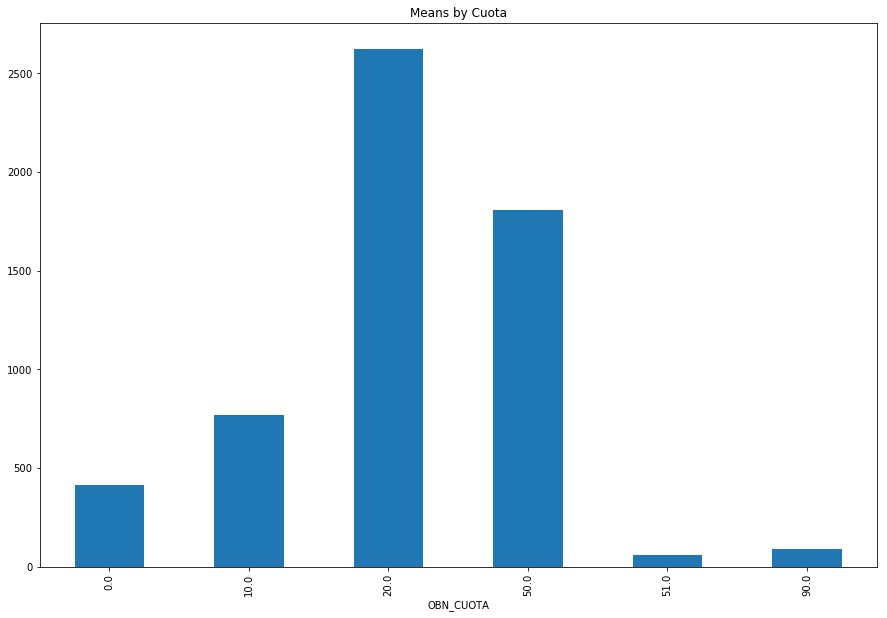

In [10]:
mean_cuota = clean_df.groupby('OBN_CUOTA').MCC_IMPORTE.mean()
mean_cuota.plot(kind='bar', title='Means by Cuota')

In [11]:
clean_df.groupby('OBN_CUOTA').MCC_IMPORTE.sum()

OBN_CUOTA
0.0       20984.37
10.0     402155.03
20.0    1183577.92
50.0     640708.12
51.0        741.09
90.0       1035.79
Name: MCC_IMPORTE, dtype: float64

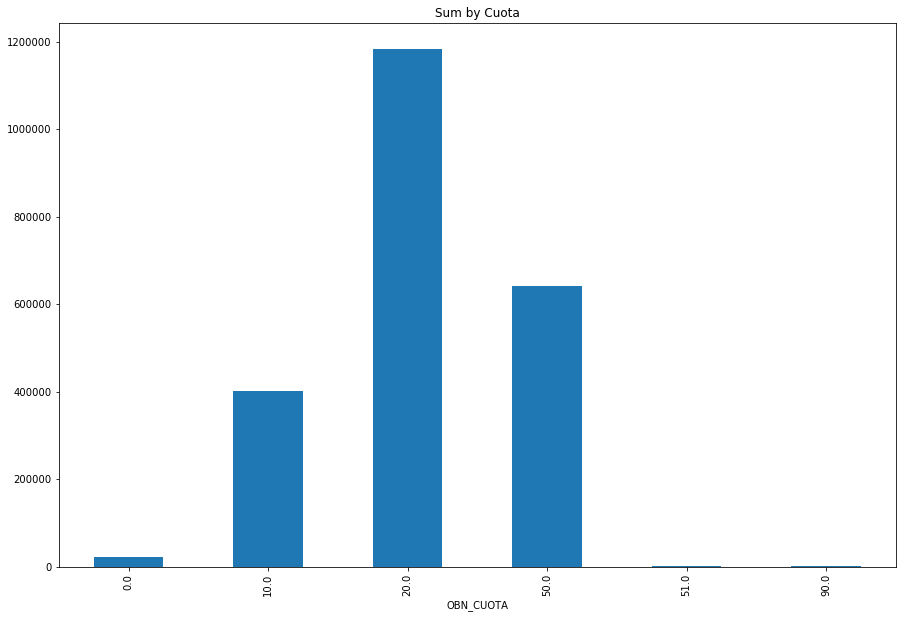

In [12]:
sum_cuota = clean_df.groupby('OBN_CUOTA').MCC_IMPORTE.sum()
sum_cuota.plot(kind='bar', title='Sum by Cuota')

## Descriptive statistics - ALL CUOTA TYPES

## BY PERIOD  ( year + month ) 

In [13]:
clean_df.groupby('Period').MCC_IMPORTE.describe()

,count,mean,std,min,25%,50%,75%,max
Period,,,,,,,,
2014-01,6.0,542.440000,328.930132,38.55,333.5475,684.845,747.9250,861.00
2014-03,4.0,128.027500,219.505169,0.76,20.6650,27.300,134.6625,456.75
2014-04,14.0,433.195714,484.399451,0.04,128.7000,414.775,446.3000,1943.40
2014-05,68.0,395.888235,495.453539,0.01,11.3200,273.000,609.3250,2308.04
2014-06,2.0,327.400000,393.292792,49.30,188.3500,327.400,466.4500,605.50
2014-07,4.0,14.047500,14.642066,1.24,2.0425,12.075,24.0800,30.80
2014-08,4.0,250.337500,249.271996,33.82,41.9275,221.265,429.6750,525.00
2014-09,21.0,208.778571,241.758407,0.01,2.6500,189.050,350.7500,1023.80
2014-10,10.0,114.097000,166.943222,0.05,6.7075,19.315,215.6175,452.07


In [14]:
clean_df.groupby('Period').MCC_IMPORTE.mean()

Period
2014-01      542.440000
2014-03      128.027500
2014-04      433.195714
2014-05      395.888235
2014-06      327.400000
2014-07       14.047500
2014-08      250.337500
2014-09      208.778571
2014-10      114.097000
2014-11      196.961000
2014-12       79.942857
2015-01       71.172500
2015-02      321.370000
2015-03      565.815000
2015-04      249.715385
2015-05      157.556667
2015-06      239.159000
2015-07      869.346667
2015-09      116.710000
2015-10       77.994286
2015-11      161.877143
2015-12      107.320526
2016-01       70.136667
2016-03       51.540000
2016-04    17546.900000
2016-05      212.780000
2016-06       31.450000
2016-07      203.313333
2016-08     1556.453000
2016-10     4968.522222
2016-11      412.546000
2016-12      115.575000
2017-01      536.583000
2017-02      205.285000
2017-03      301.933333
2017-04       43.602500
2017-05     1153.350000
2017-06      371.006667
2017-08      116.365000
2017-09     4495.508913
2017-10     3454.274082
2017-11  

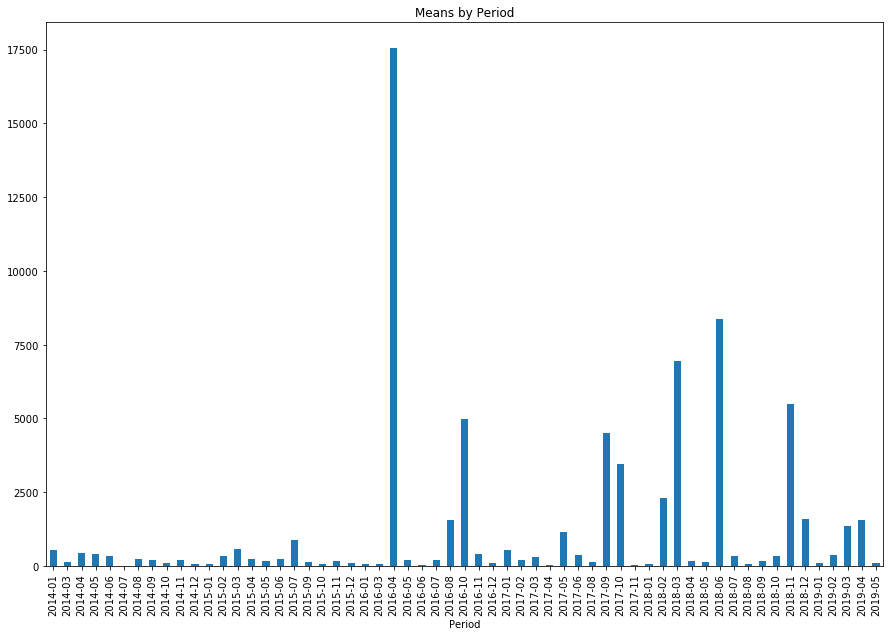

In [15]:
# What happened in April 2016? 
mean_period = clean_df.groupby('Period').MCC_IMPORTE.mean()
mean_period.plot(kind='bar', title='Means by Period')

In [16]:
clean_df.groupby('Period').MCC_IMPORTE.sum()

Period
2014-01      3254.64
2014-03       512.11
2014-04      6064.74
2014-05     26920.40
2014-06       654.80
2014-07        56.19
2014-08      1001.35
2014-09      4384.35
2014-10      1140.97
2014-11      1969.61
2014-12       559.60
2015-01       284.69
2015-02      1285.48
2015-03      2263.26
2015-04      3246.30
2015-05       945.34
2015-06      2391.59
2015-07      5216.08
2015-09       466.84
2015-10      2729.80
2015-11      2266.28
2015-12      2039.09
2016-01       420.82
2016-03       103.08
2016-04    140375.20
2016-05       638.34
2016-06        62.90
2016-07       609.94
2016-08     31129.06
2016-10    178866.80
2016-11      2062.73
2016-12      3698.40
2017-01     10731.66
2017-02       821.14
2017-03      1811.60
2017-04       174.41
2017-05     24220.35
2017-06      1113.02
2017-08       698.19
2017-09    206793.41
2017-10    169259.43
2017-11       367.02
2018-01       129.30
2018-02     94073.32
2018-03    124896.10
2018-04      1871.54
2018-05      7130.05
2018-0

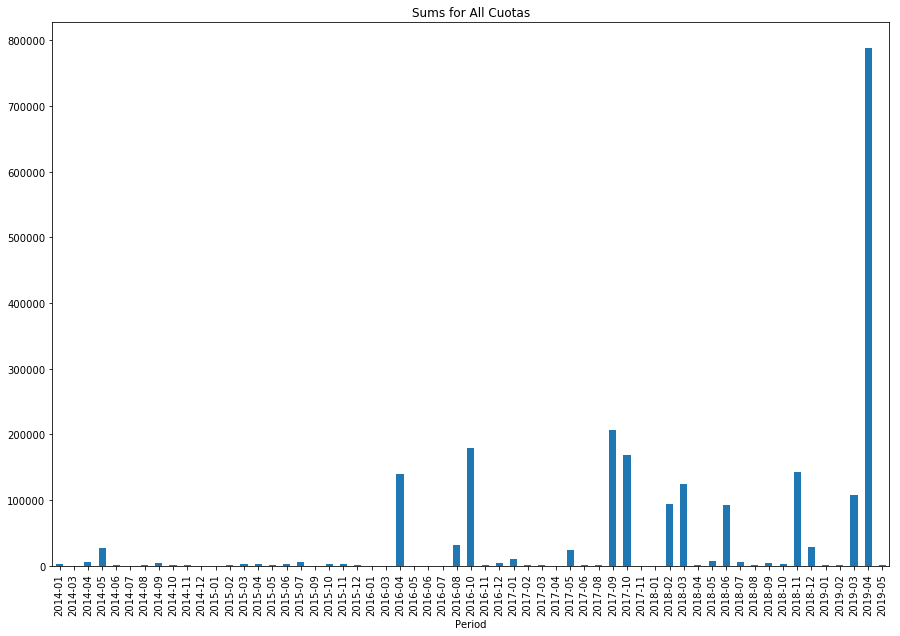

In [17]:
# cumulative sums for all of the cuotas taken together
sum_period = clean_df.groupby('Period').MCC_IMPORTE.sum()
#sum_period.cumsum().tail()
sum_period.plot(kind='bar', title='Sums for All Cuotas')

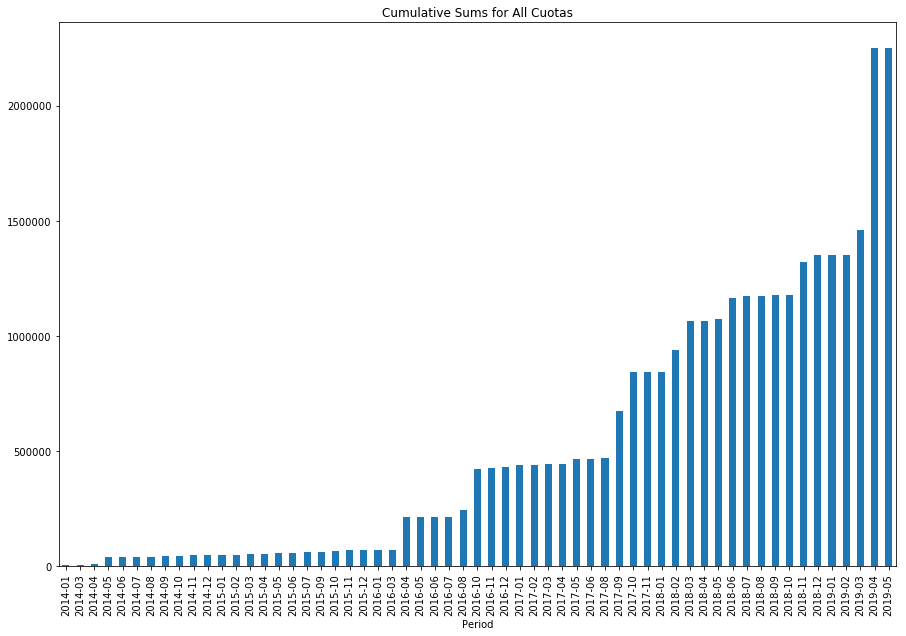

In [18]:
# this is our graph of the cumulative sums for all of the cuotas taken together
cum_period = sum_period.cumsum()
cum_period.plot(kind='bar',  title='Cumulative Sums for All Cuotas')

## set up a graphing function

In [19]:
cuota_group = clean_df.groupby('OBN_CUOTA')

In [20]:
def cum_sum_graph(self):
    grupo = cuota_group.get_group(self)
    grupo_sum = grupo.groupby('Period').MCC_IMPORTE.sum()
    grupo_cum = grupo_sum.cumsum()
    grupo_cum.plot(kind='bar', title='Cumulative Totals')

In [21]:
def mean_series(self):
    grupo_mean = cuota_group.get_group(self)
    print(grupo_mean.groupby('Period').MCC_IMPORTE.mean())

## CUOTA 0

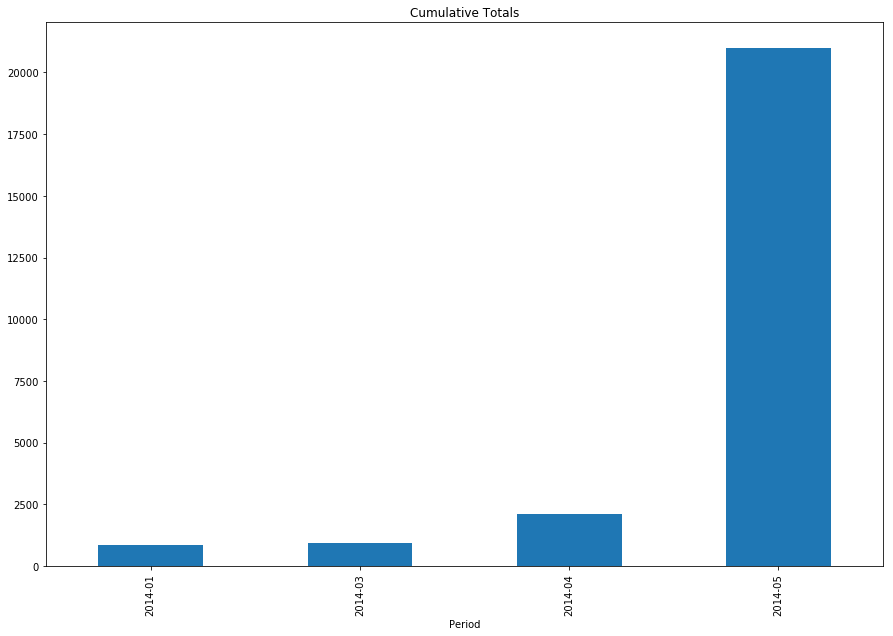

In [22]:
cum_sum_graph(0.0)

In [23]:
mean_series(0.0)

Period
2014-01    861.000000
2014-03     18.453333
2014-04    238.608000
2014-05    449.404048
Freq: M, Name: MCC_IMPORTE, dtype: float64


## CUOTA 10

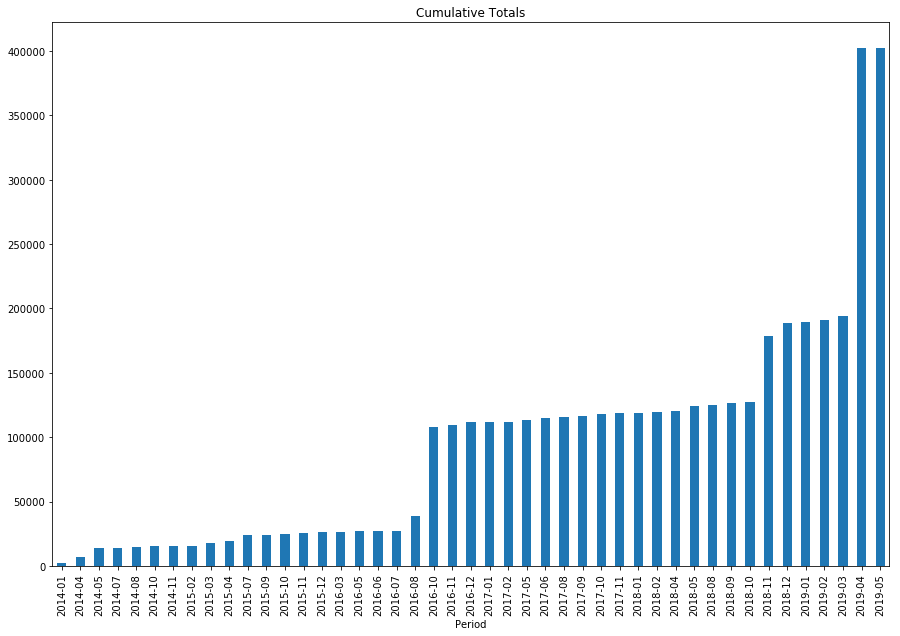

In [24]:
cum_sum_graph(10.0)

In [25]:
mean_series(10.0)

Period
2014-01     540.305000
2014-04     541.300000
2014-05     288.936087
2014-07      14.047500
2014-08     250.337500
2014-10      97.622500
2014-11     120.660000
2015-02     196.225000
2015-03     565.815000
2015-04     210.690000
2015-07    1167.462500
2015-09     224.885000
2015-10      56.108182
2015-11     184.120000
2015-12      86.628571
2016-03      51.540000
2016-05     212.780000
2016-06      31.450000
2016-07      34.300000
2016-08    1494.857500
2016-10    5730.550000
2016-11     517.890000
2016-12     130.799412
2017-01      36.726667
2017-02     211.950000
2017-05     318.064000
2017-06     371.006667
2017-08     163.780000
2017-09     132.834286
2017-10     129.480667
2017-11      39.730000
2018-01      64.650000
2018-02     239.386667
2018-04     262.900000
2018-05     216.724500
2018-08      88.715000
2018-09     193.366667
2018-10     317.575000
2018-11    7357.377143
2018-12    1730.925000
2019-01      97.145000
2019-02     371.006667
2019-03     106.438000
2019

## CUOTA 20

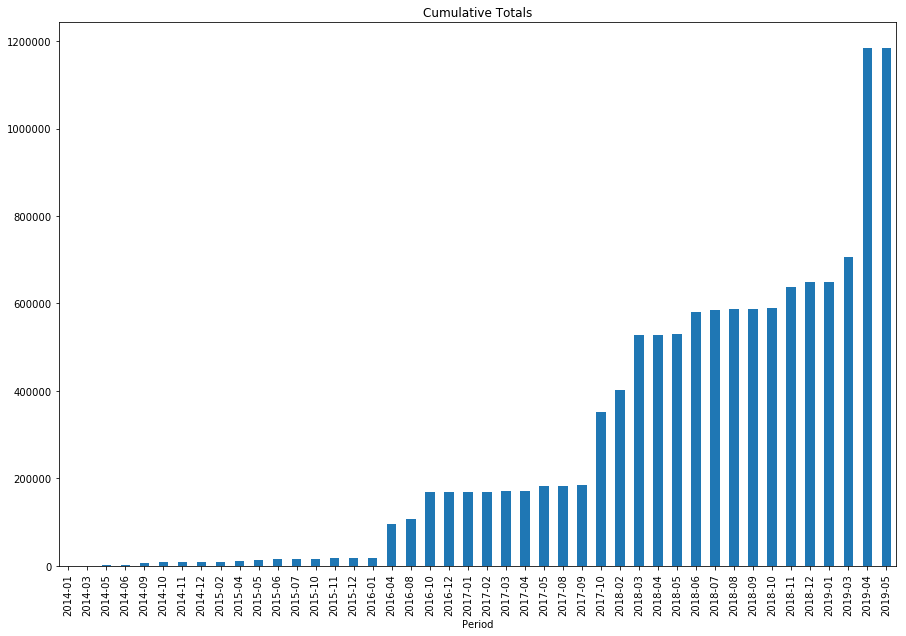

In [26]:
cum_sum_graph(20.0)

In [27]:
mean_series(20.0)

Period
2014-01      232.420000
2014-03      456.750000
2014-05      466.633333
2014-06      327.400000
2014-09      218.869500
2014-10      148.528000
2014-11      240.833333
2014-12       92.843333
2015-02      446.515000
2015-04      387.650000
2015-05      213.260000
2015-06      270.457500
2015-07      273.115000
2015-10       96.217273
2015-11      190.260000
2015-12      133.970000
2016-01       61.640000
2016-04    19574.450000
2016-08     1769.833333
2016-10     5088.416667
2016-12      121.248889
2017-01       19.480000
2017-02      198.620000
2017-03      286.220000
2017-04       32.375000
2017-05     2044.583333
2017-08       21.535000
2017-09      195.992500
2017-10     5942.458571
2018-02     2713.710000
2018-03     7769.868750
2018-04      147.712500
2018-05       83.804286
2018-06    12563.600000
2018-07      370.097778
2018-08       83.425000
2018-09      155.290000
2018-10      367.742500
2018-11     7002.095714
2018-12     1649.550000
2019-01       90.688333
2019-03  

## CUOTA 50

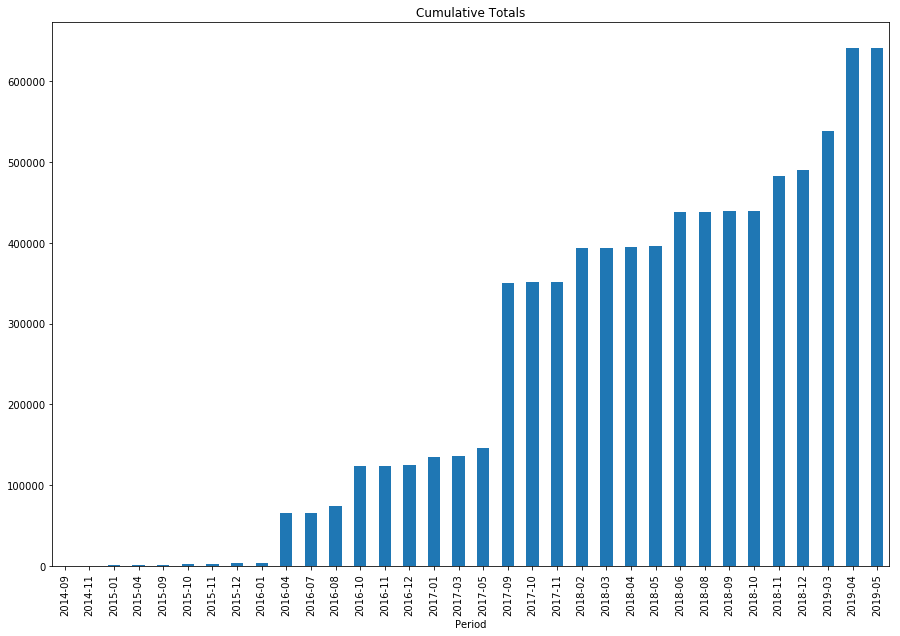

In [28]:
cum_sum_graph(50.0)

In [29]:
mean_series(50.0)

Period
2014-09        6.960000
2014-11      124.033333
2015-01       71.172500
2015-04       84.866667
2015-09        8.535000
2015-10       81.093846
2015-11       97.060000
2015-12      112.101250
2016-01       87.130000
2016-04    15519.350000
2016-07      287.820000
2016-08     1425.200000
2016-10     4086.600000
2016-11      254.530000
2016-12       63.928333
2017-01      872.695000
2017-03      333.360000
2017-05     1284.536250
2017-09     6590.181613
2017-10      154.730000
2017-11        9.896667
2018-02     2199.719474
2018-03      289.100000
2018-04      122.997500
2018-05      115.878571
2018-06    10448.900000
2018-08       69.237500
2018-09      152.967778
2018-10      252.645000
2018-11     3551.075833
2018-12     1379.000000
2019-03     1979.735000
2019-04      860.850420
2019-05       85.295000
Freq: M, Name: MCC_IMPORTE, dtype: float64


## CUOTA 51

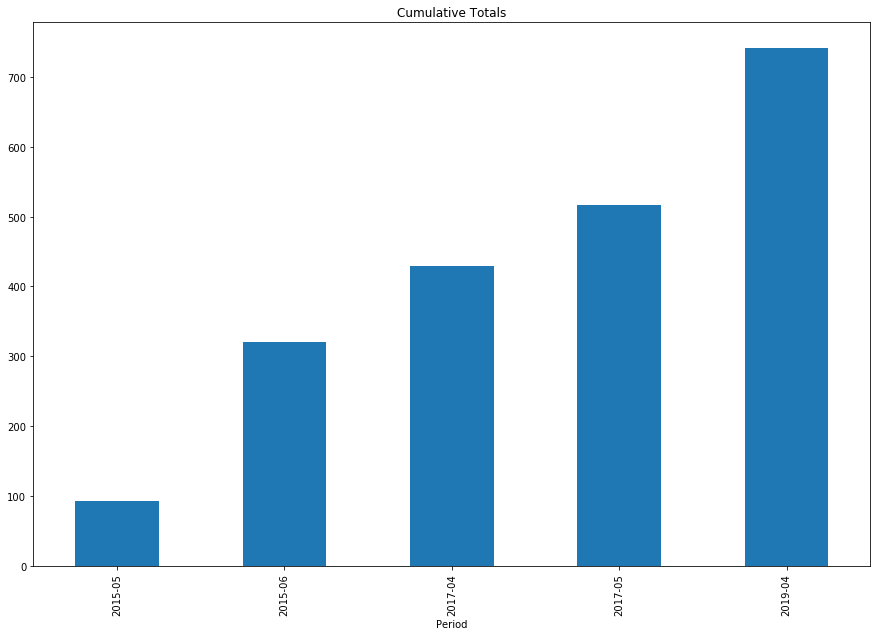

In [30]:
cum_sum_graph(51.0)

In [31]:
mean_series(51.0)

Period
2015-05     46.150
2015-06    113.965
2017-04     54.830
2017-05     43.120
2019-04     44.992
Freq: M, Name: MCC_IMPORTE, dtype: float64


## CUOTA 90

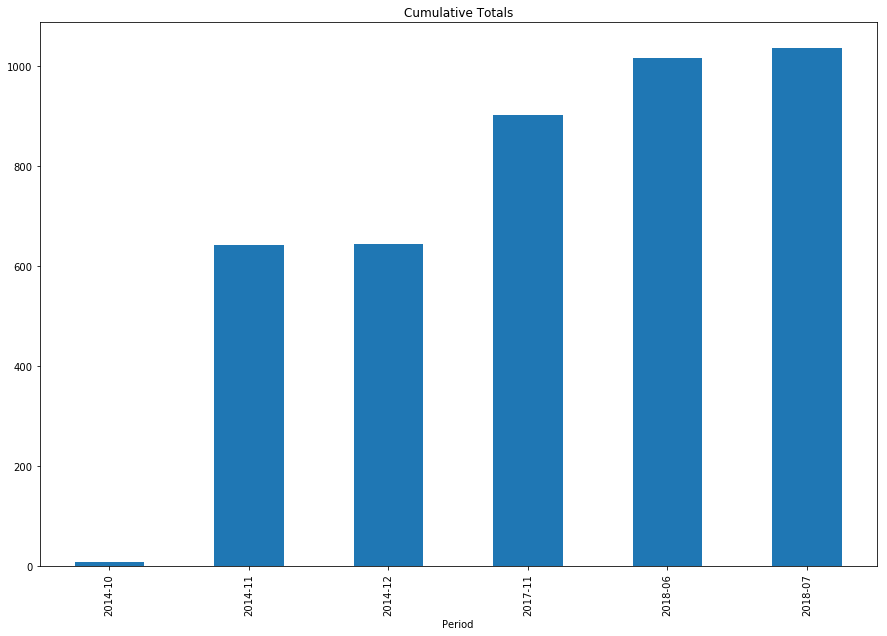

In [32]:
cum_sum_graph(90.0)

In [33]:
mean_series(90.0)

Period
2014-10      7.840000
2014-11    316.845000
2014-12      2.540000
2017-11     85.956667
2018-06     38.183333
2018-07      9.650000
Freq: M, Name: MCC_IMPORTE, dtype: float64
